# Running experiments to improve our model

```
Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evalute it -> tweak it -> etc
```

Ways to improve the model:

1. Get more data - get more examples for your model to train on (more opportunities to learn patterns or relationships between features and labels)

2. Make your model larger (using a more complex model) - this might come in the form of more layers or more hidden units in each layer.

3. Train for longer - give your model more of a chance to find patterns in the data.

Lets do 3 modeling experiments:

1. model_1 - same as original model, 1 layer, but train for 100 epochs

2. model_2 - 2 layers, trained for 100 epochs

3. model_3 - 2 layers, trained for 500 epochs

In [108]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd

In [109]:
print(tf.__version__), sys.version

2.4.1


(None, '3.7.3 (default, Jan 22 2021, 20:04:44) \n[GCC 8.3.0]')

# Create Data

In [110]:
# Set random seed for reproducibility
tf.random.set_seed(42)

In [111]:
# Create our training data
X = tf.range(-100, 100, 4)
y = X + 10

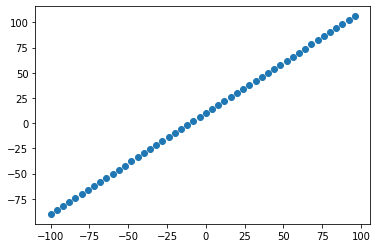

In [112]:
# Visualize the data
plt.scatter(X, y)

In [113]:
# Split the data into train and test sets
X_train = X[:40] #first 40 are training samples (80% of the dataset)
y_train = y[:40]

X_test = X[40:] #last 10 are testing samples (20% of the data)
y_test = y[40:] 

len(X), len(y), len(X_train), len(X_test), len(y_train), len(y_test)


(50, 50, 40, 10, 40, 10)

# Reusable Functions

In [114]:
# Build a plotting function to visualize our results
def plot_predictions (train_data, # = X_train,
                      train_labels, # = y_train,
                      test_data, # = X_test,
                      test_labels, # = y_test,
                      predictions):
    """
    Plots training data, test data, and compares predictions to ground truth labels.
    """
    plt.figure(figsize=(10,7))
    #Plot trainging data in blue
    plt.scatter(train_data, train_labels, c="b", label="Training Data")
    # Plot testing data in green
    plt.scatter(test_data, test_labels, c="g", label="Testing Data")
    # Plot models predictions in red
    plt.scatter(test_data, predictions, c="r", label="Predictions")
    # Show the legend
    plt.legend()

# Make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
    return tf.metrics.mean_absolute_error(y_true = y_true, y_pred = tf.squeeze(y_pred)).numpy()

def mse(y_true, y_pred):
    return tf.metrics.mean_squared_error(y_true = y_true, y_pred = tf.squeeze(y_pred)).numpy()

# Model 1 Build and Evaluate

1 Dense Layer, trained for 100 epochs

In [115]:
# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ["mae"]
)

# 3. Fit the model
model_1.fit(X_train, y_train, epochs = 100)

Epoch 1/100
2/2 [==============================] - 1s 9ms/step - loss: 16.4124 - mae: 16.4124
Epoch 2/100
2/2 [==============================] - 0s 9ms/step - loss: 11.0829 - mae: 11.0829
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 11.1242 - mae: 11.1242
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 8.6945 - mae: 8.6945
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 9.8003 - mae: 9.8003
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 9.5263 - mae: 9.5263
Epoch 7/100
2/2 [==============================] - 0s 12ms/step - loss: 8.4102 - mae: 8.4102
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 9.1449 - mae: 9.1449
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 19.4932 - mae: 19.4932
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 9.6061 - mae: 9.6061
Epoch 11/100
2/2 [==============================] - 0s 10ms/step - los

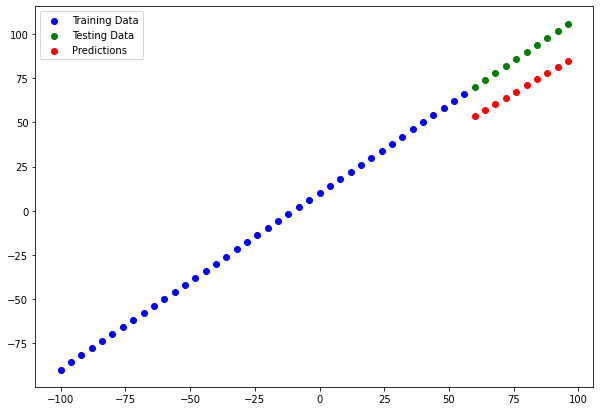

In [116]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(train_data = X_train,
                 train_labels = y_train,
                 test_data = X_test,
                 test_labels = y_test,
                 predictions=y_preds_1)

In [117]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1, mse_1

# On average, per MAE, each prediction is 18.74 away from where it should be

(18.745327, 353.57336)

# Model 2 Build and Evaluate

2 Dense Layers, trained for 100 epochs

In [118]:
# 1. Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = [tf.keras.metrics.mae, tf.keras.metrics.mse]
)

# 3. Fit the model
model_2.fit(X_train, y_train, epochs = 100)

Epoch 1/100
2/2 [==============================] - 1s 7ms/step - loss: 77.0856 - mean_absolute_error: 77.0856 - mean_squared_error: 8550.2907
Epoch 2/100
2/2 [==============================] - 0s 9ms/step - loss: 17.0775 - mean_absolute_error: 17.0775 - mean_squared_error: 458.0873
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 20.1814 - mean_absolute_error: 20.1814 - mean_squared_error: 597.2403
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 12.5192 - mean_absolute_error: 12.5192 - mean_squared_error: 196.8841
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 14.1468 - mean_absolute_error: 14.1468 - mean_squared_error: 243.6306
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 11.6317 - mean_absolute_error: 11.6317 - mean_squared_error: 154.1264
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 12.8263 - mean_absolute_error: 12.8263 - mean_squared_error: 216.9939
Epoch 8/100


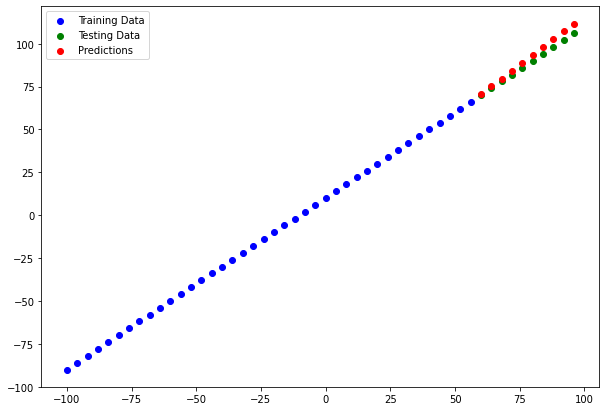

In [119]:
y_preds_2 = model_2.predict(X_test)
plot_predictions(train_data = X_train,
                 train_labels = y_train,
                 test_data = X_test,
                 test_labels = y_test,
                 predictions=y_preds_2)



In [120]:
# Calculate model_2 evaluation metrics
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2


(3.1109955, 12.497055)

# Model 3 Build and Evaluate

2 Dense Layers, trained for 500 epochs

This model, because we train for too long ends up overfitting.

In [121]:
# 1. Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile (
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = [tf.keras.metrics.mae, tf.keras.metrics.mse]
)

# 3. Fit the model
model_3.fit(X_train, y_train, epochs = 500)


_squared_error: 669.5442
Epoch 361/500
2/2 [==============================] - 0s 9ms/step - loss: 10.0973 - mean_absolute_error: 10.0973 - mean_squared_error: 181.6470
Epoch 362/500
2/2 [==============================] - 0s 9ms/step - loss: 6.0635 - mean_absolute_error: 6.0635 - mean_squared_error: 59.0141
Epoch 363/500
2/2 [==============================] - 0s 9ms/step - loss: 24.1833 - mean_absolute_error: 24.1833 - mean_squared_error: 862.0324
Epoch 364/500
2/2 [==============================] - 0s 8ms/step - loss: 30.5319 - mean_absolute_error: 30.5319 - mean_squared_error: 1338.0711
Epoch 365/500
2/2 [==============================] - 0s 9ms/step - loss: 7.7323 - mean_absolute_error: 7.7323 - mean_squared_error: 88.4881
Epoch 366/500
2/2 [==============================] - 0s 11ms/step - loss: 5.7053 - mean_absolute_error: 5.7053 - mean_squared_error: 40.7557
Epoch 367/500
2/2 [==============================] - 0s 7ms/step - loss: 36.5130 - mean_absolute_error: 36.5130 - mean_squar

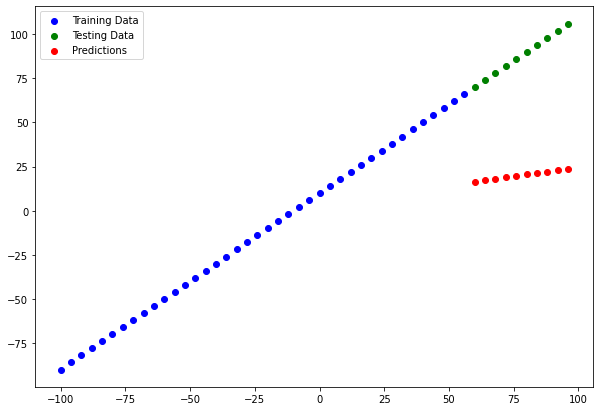

In [122]:
y_preds_3 = model_3.predict(X_test)
plot_predictions(train_data = X_train,
                 train_labels = y_train,
                 test_data = X_test,
                 test_labels = y_test,
                 predictions=y_preds_3)


In [123]:
# Calculate model_2 evaluation metrics
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

(67.90955, 4696.0615)

# Comparing the results of our experiments

We've run a few experiments now, let's compare the results.

### Tracking your experiments
One really good habit in machine learning modeling is to track the results of your experiments.
When doing so, it can be tedious if you are running lots of experiments. Luckily there are tools to help us.
As you build more models you'll want to look into using:

* TensorBoard - a component of the tensorflow library to help track modelling experiments.
* Weights and Biases - a tool for tracking all kinds of machine learning experiments. Plugs straight into tensorboard.


In [124]:
# Lets compare our models results using a pandas dataframe
model_results = [
    ["model_1", mae_1, mse_1],
    ["model_2", mae_2, mse_2],
    ["model_3", mae_3, mse_3]
]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,18.745327,353.573364
1,model_2,3.110996,12.497055
2,model_3,67.909554,4696.061523


In [125]:
# Model 2 performed the best, lets look at it
model_2.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_38 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_39 (Dense)             (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


# Saving and Loading Models

There are two main formats we can save our model to:

1. SavedModel format - pb file (protobuf file)

2. HDF5 format - hierarchical data format, this may be better if we will be using the model outside of pure tensorflow code

In [130]:
# Save the model in both pb and hdf5 formats
model_2.save("./saved_model_2") #saves in pb format
model_2.save("./saved_model_2.h5") #saves in hdf5 form, just by adding .h5 to the extension

INFO:tensorflow:Assets written to: ./saved_model_2/assets


In [132]:
# Loading in a saved model (pb format)
loaded_SavedModel_pb = tf.keras.models.load_model("./saved_model_2")
loaded_SavedModel_pb.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_38 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_39 (Dense)             (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [137]:
# Compare model_2 predictions with SavedModel format model predictions
model_2_preds = model_2.predict(X_test)
loaded_savedmodel_2_pb_preds = loaded_SavedModel_pb.predict(X_test)
mae(y_true = y_test, y_pred=model_2_preds), mae(y_true = y_test, y_pred=loaded_savedmodel_2_pb_preds), model_2_preds == loaded_savedmodel_2_pb_preds

(3.1109955,
 3.1109955,
 array([[ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True]]))

In [136]:
# Loading in a saved model (hdf5 format)
loaded_SavedModel_h5 = tf.keras.models.load_model("./saved_model_2.h5")
loaded_SavedModel_h5.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_38 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_39 (Dense)             (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [138]:
# Compare model_2 predictions with SavedModel format model predictions
model_2_preds = model_2.predict(X_test)
loaded_savedmodel_2_h5_preds = loaded_SavedModel_h5.predict(X_test)
mae(y_true = y_test, y_pred=model_2_preds), mae(y_true = y_test, y_pred=loaded_savedmodel_2_h5_preds), model_2_preds == loaded_savedmodel_2_h5_preds

(3.1109955,
 3.1109955,
 array([[ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True]]))